# ---------------Predicting the risk of heart disease by sympthoms-------------

<img src='https://www.sujyotheartclinic.com/wp-content/uploads/2020/12/symptom.png' width='600' height='400'/>

### Table of contents
- 1.  Import tools
- 2.  Download data and Cleaning data
- 3.  Preprocessing data and Vizualization
- 4.  Building a model
- 5.  Training and Testing
- 6.  Final Vizualization

#### Import tools

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from warnings import *
import json
from sklearn.model_selection import train_test_split as split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
filterwarnings("ignore")

#### Introduction to data

In [2]:
file_path = "files_csv//heartdisease.csv"
datas = pd.read_csv(file_path)
datas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Column names' meanings

0. **Sex** - Gender of the person [1: Male, 0: Female]

1.  **cp** - Constrictive pericarditis = is a form of diastolic heart failure that arises because an inelastic pericardium inhibits cardiac filling.[1-Typical Type 1 Angina; 2- Atypical Type Angina; 3-Non-angina pain; 4-Asymptomatic)

2.  **trestbps** - the reading of the resting blood pressure.

3.  **chol** - cholestrol (high cholesterol can increase your risk of heart disease).

4. **fbs** - Fasting glucose level(Both low glucose level and impaired fasting glucose should be considered as predictors of risk for stroke and coronary heart disease).

5. **restecg** - the resting electrocardiographic result

6. **thalach** - the maximum heart rate

7. **exang** - the exercise induced angina

8. **oldpeak** - ST depression induced by exercise relative to rest

9. **slope** - Slope of the Peak Exercise ST segment

10. **ca** - Number of major vessels colored by fluoroscopy

11. **thal** - 3 – Normal, 6 – Fixed Defect, 7 – Reversible Defect

12. **target** - disease risk [1 - yes , 0 - No]

In [3]:
datas.info() #gives information about column types , null-rows etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
datas.isna().sum() # clarify nanvalues

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
datas.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Plotting

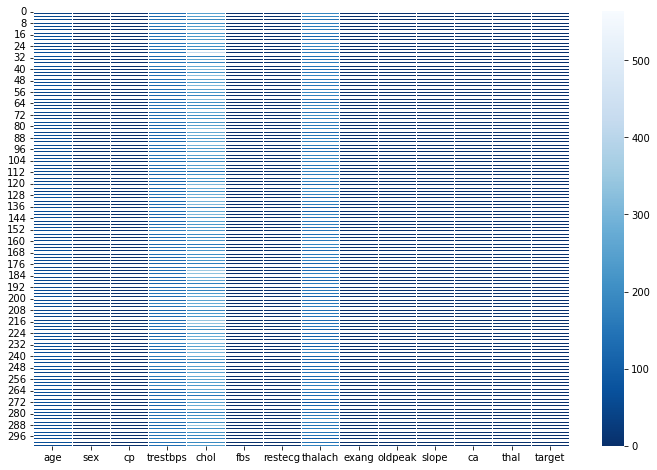

In [6]:
plt.figure(figsize=(12,8))
sb.heatmap(data=datas,cmap="Blues_r",linewidths=1)
plt.show()

<Figure size 1584x1296 with 0 Axes>

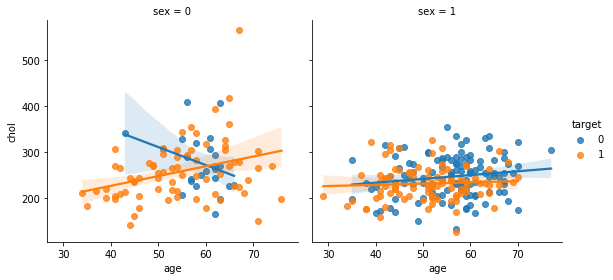

In [7]:
plt.figure(figsize=(22,18))
sb.lmplot(data=datas, x="age", y="chol",hue="target", col="sex", height=4,)
plt.show()

##### Men
> The data above shows that the more men patients are older,the more cholestrol they gain.But surprisingly the risk of heart disease is higher in the men who are thinner.The risk arises among skinny people of the age group between 50 and 60.

##### Women
> As far as women patients concerned the risk is high between thinner and middle age(35-55)ladies.Only about 60% of women around 60 may not complain about heart disease.The oldest women patients are likely to have serius heart problems.obesity is the same issue when they get older 

_____________________Fasting glucose level______________


<Figure size 1584x1296 with 0 Axes>

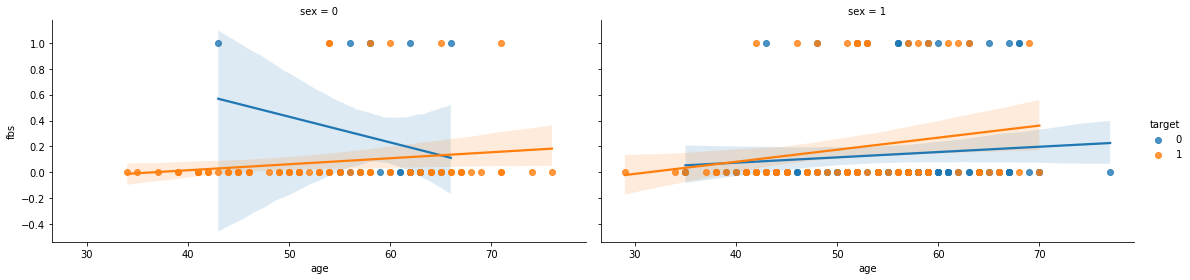

In [58]:
plt.figure(figsize=(22,18))
print("_____________________Fasting glucose level______________")
sb.lmplot(data=datas, x="age", y="fbs",hue='target', col="sex",height=4,aspect=2)
plt.show()

In [69]:
%matplotlib 
plt.figure(figsize=(120,60))
print("___________________________________")
sb.lmplot(data=datas, x="thal", y="cp",hue='target', col="oldpeak",height=4)
plt.show()

Using matplotlib backend: <object object at 0x0000016492B11300>
___________________________________


#### Preprocessing data

In [8]:
X = datas.drop('target',axis=1).values
y = datas['target'].values

In [9]:
x_train,x_test,y_train,y_test = split(X,y,test_size=0.2,random_state=35)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
x_train

array([[37.,  1.,  2., ...,  0.,  0.,  2.],
       [48.,  1.,  0., ...,  2.,  2.,  3.],
       [61.,  1.,  0., ...,  1.,  1.,  2.],
       ...,
       [54.,  1.,  2., ...,  0.,  1.,  2.],
       [61.,  1.,  3., ...,  1.,  2.,  2.],
       [60.,  1.,  0., ...,  1.,  1.,  3.]], dtype=float32)

#### Build a Gaussian Classifier

In [12]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [13]:
model.score(x_test,y_test)

0.7868852459016393

In [14]:
prds = model.predict(x_test)

#### Addidtion  metrics to check model score

In [15]:
accuracy = accuracy_score(prds, y_test)
f1 = f1_score(prds, y_test, average="weighted")
prec = precision_score(prds,y_test)
recal = recall_score(prds,y_test)
print("Accuracy:", accuracy)

print("F1 Score:", f1)

print('precision_score: ',prec)

print('recall_score:',recal)


Accuracy: 0.7868852459016393
F1 Score: 0.7858442511733434
precision_score:  0.7714285714285715
recall_score: 0.84375


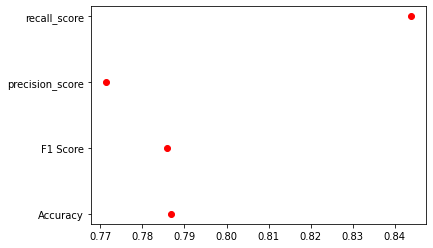

In [16]:
plt.figure(figsize=(6,4))
values=[accuracy,f1,prec,recal]
y_lab = ["Accuracy","F1 Score",'precision_score','recall_score']
plt.scatter(x=values,y=y_lab,color='r')
plt.show()